In [29]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
with open('innocentium.json', 'r') as file:
    data = json.load(file)

In [31]:
titles = np.array([])
favourites = np.array([])
comments = np.array([])
published_time = np.array([])
tags = []
daily_deviations = []

In [32]:
for key in data:
    titles = np.append(titles, key)
    comments = np.append(comments, data[key][0]['comments'])
    favourites = np.append(favourites, data[key][0]['favourites'])
    published_time = np.append(published_time, data[key][1].split(' ')[0])
    tags.append(data[key][2])
    daily_deviations.append(data[key][3])

In [33]:
df = pd.DataFrame({'titles' : titles, 'comments' : comments, 'favourites' : favourites, 'published_time' : published_time, 'tags' : tags, 'daily_deviation_staus' : daily_deviations})
print(df.shape)
df.head()

(581, 6)


,titles,comments,favourites,published_time,tags,daily_deviation_staus
0,Spotty Little Jelly,15.0,33.0,2023-12-03,"[animal, animalphotography, aquatic, blue, jel...",False
1,Tammar Wallaby,8.0,39.0,2023-11-26,"[animalphotography, cute, marsupial, wallaby, ...",False
2,Warmth of the Sun,7.0,47.0,2023-11-19,"[animalphotography, bigcat, cat, kitty, lion, ...",False
3,Tea Time Turkey,8.0,32.0,2023-11-12,"[animal, animalphotography, bird, cute, dollho...",False
4,Crested Screamer,11.0,34.0,2023-11-05,"[animalphotography, animalportrait, bird, wild...",False


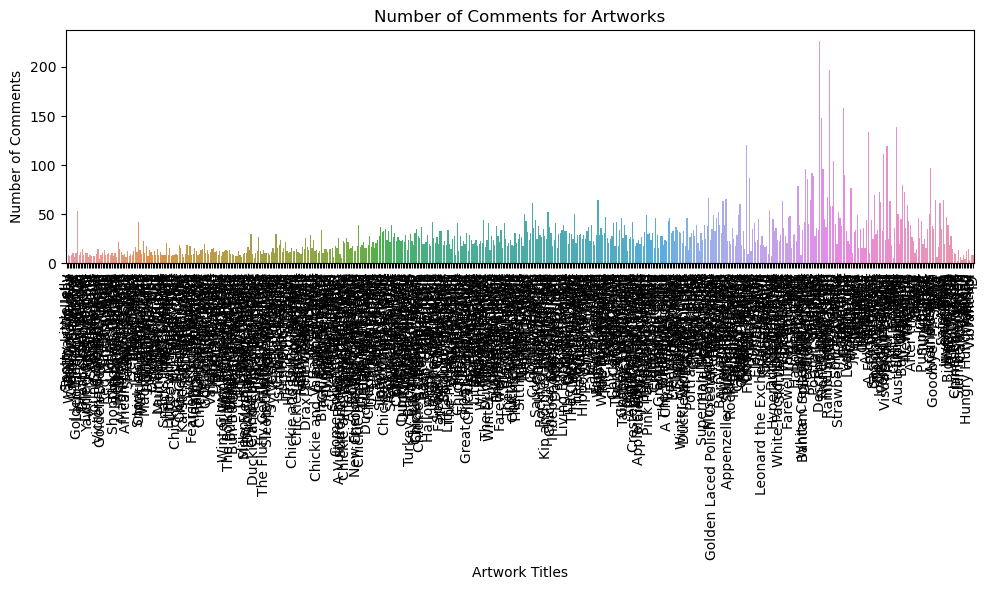

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='titles', y='comments', data=df)
plt.xticks(rotation=90)
plt.xlabel('Artwork Titles')
plt.ylabel('Number of Comments')
plt.title('Number of Comments for Artworks')
plt.tight_layout()
plt.show()

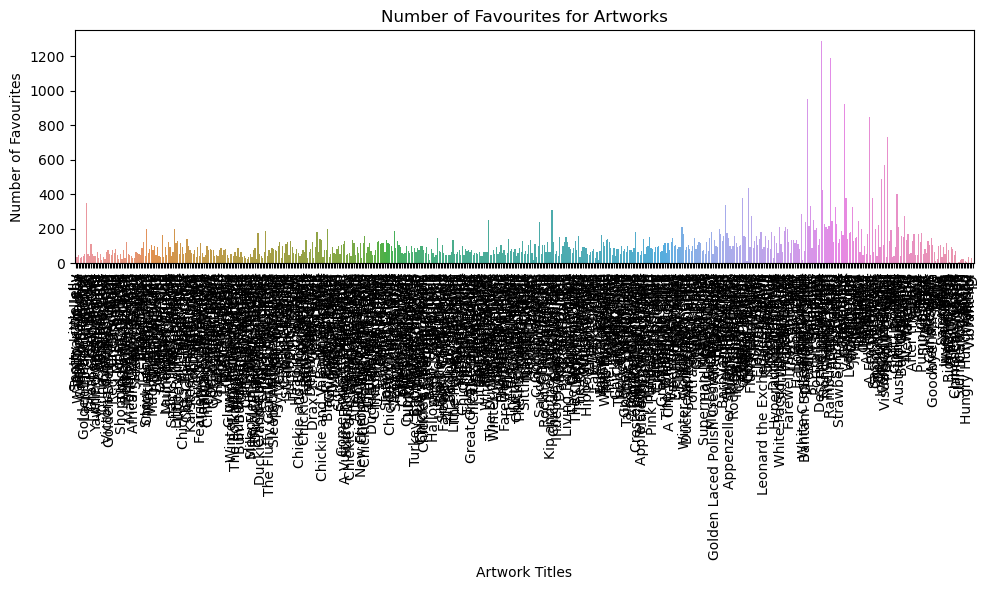

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x='titles', y='favourites', data=df)
plt.xticks(rotation=90)
plt.xlabel('Artwork Titles')
plt.ylabel('Number of Favourites')
plt.title('Number of Favourites for Artworks')
plt.tight_layout()
plt.show()

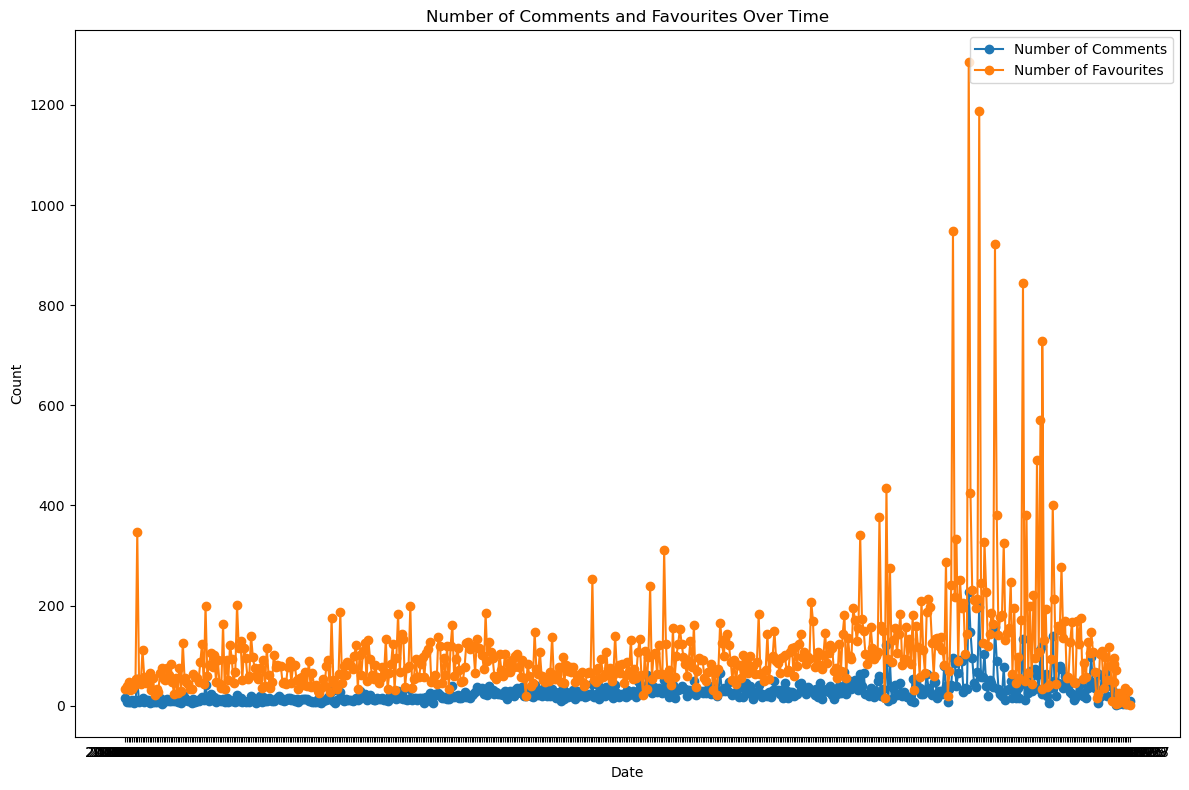

In [36]:
plt.figure(figsize=(12, 8))

plt.plot(df['published_time'], df['comments'], marker='o', label='Number of Comments')

plt.plot(df['published_time'], df['favourites'], marker='o', label='Number of Favourites')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Number of Comments and Favourites Over Time')
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
#df_tags = df[df['tags'].apply(lambda x: len(x) > 0)]

In [38]:
sorted_favourites_df = df.sort_values(by='favourites', ascending=False)
sorted_favourites_df.head(10)

,titles,comments,favourites,published_time,tags,daily_deviation_staus
482,Descending Jellyfish,226.0,1285.0,2014-06-22,[],True
488,Rambunctious Kitten,197.0,1187.0,2014-05-04,[],False
473,Disgruntled Tiger,96.0,949.0,2014-09-07,"[angry, animal, cat, fang, feline, indochinese...",False
497,Tranquility,158.0,922.0,2014-03-08,[],False
513,Wishful,134.0,845.0,2013-09-08,[],False
525,Snow Leopard,120.0,729.0,2013-06-10,[],False
523,Voracious Bobcat,111.0,570.0,2013-06-16,[],False
521,Indochinese Tiger,62.0,490.0,2013-07-14,[],False
435,Gosling Siblings,121.0,435.0,2016-03-05,"[adorable, bird, birds, cute, fluff, fluffy, g...",True
483,The Littlest Hat,148.0,424.0,2014-06-08,[],False


- https://www.deviantart.com/innocentium/art/Descending-Jellyfish-462626821
- https://www.deviantart.com/innocentium/art/Rambunctious-Kitten-451919748
- https://www.deviantart.com/innocentium/art/Disgruntled-Tiger-480804658
- https://www.deviantart.com/innocentium/art/Tranquility-438991987
- https://www.deviantart.com/innocentium/art/Wishful-398878981

In [39]:
sorted_dates_df = df.sort_values(by='published_time')
sorted_dates_df.head()

,titles,comments,favourites,published_time,tags,daily_deviation_staus
580,ID,9.0,2.0,2009-09-27,[],False
579,Vibrant Koi,8.0,30.0,2009-09-28,[],False
578,Watusi,3.0,3.0,2009-10-19,[],False
577,Watusi 2,15.0,36.0,2009-10-26,[],False
575,Caiman,4.0,13.0,2010-02-06,[],False


In [40]:
n_star = (2.0, 0)
for i in range(1, len(sorted_dates_df['favourites'])):
    if sorted_dates_df['favourites'][i] > n_star[0]:
        n_star = (sorted_dates_df['favourites'][i], i)
        
print(n_star)                   

(1285.0, 482)


In [41]:
n_doublestar = (2.0, 0)

for i in range(1, len(sorted_dates_df['favourites'])):
    if sorted_dates_df['favourites'][i] > n_doublestar[0] and sorted_dates_df['favourites'][i] != n_star[0]:
        n_doublestar = (sorted_dates_df['favourites'][i], i)
        
print(n_doublestar)                  

(1187.0, 488)


In [42]:
diff = abs(n_star[1] - n_doublestar[1])
diff

6